In [5]:
import pandas as pd

# Classifiers and Ensembles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

In [6]:
# Carregando os dados
data=pd.read_csv("spambase.csv", header=None)

# Transformando em Numpy
val=data.values
att=data.columns
X_all=val[:,0:57]
y_all=val[:,57]

# Mostrando o formato de X e y
#print(X.shape)
#print(y.shape)

In [23]:
X = X_all
y = y_all

def classifier_select(fselect):
    
    # KNeighborsClassifier
    if fselect == 1:

        knn_params=[{'n_neighbors':[1,3,5,7,9,11], 'weights': ['uniform', 'distance'], 'p':[1,2]}]
        knn = KNeighborsClassifier()
        
        return knn_params, knn
        
    # Naive Bayes
    elif fselect == 2:
        
        nb_params=[{'var_smoothing':[1e-09,1e-03, 1e-06]}]
        nb = GaussianNB()
    
        return nb_params, nb
        
    # Decision Tree
    elif fselect == 3:
        
        dc_params=[{'criterion':['gini', 'entropy', 'log_loss'],
            'max_depth': [None, 5, 10],
            'min_samples_split':[2, 5, 10],
            'splitter':['random', 'best']}] 
        dt = DecisionTreeClassifier()
        
        return dc_params, dt
        
    # Multilayer perceptron
    elif fselect == 4:
        
        mlp_params=[{'hidden_layer_sizes':[16, (16, 8), (16, 8, 4)],
                   'learning_rate': ['constant', 'invscaling'],
                    'learning_rate_init':[0.01, 0.001, 0.0001],
                    'activation':['relu', 'logistic', 'tanh'],
                   'random_state':[10, 46, 37]}] 
        mlp = MLPClassifier()
        
        return mlp_params, mlp 
        
    # Support Vector Machine
    else:
        svm_params=[{'kernel':["linear", "poly"]}]
        svm = SVC()
        
        return svm_params, svm

params, clf = classifier_select(4)
    
X,X_val,y,y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


gs=GridSearchCV(clf, params, scoring='accuracy', cv=5, n_jobs=-1)

gs.fit(X_val, y_val)

#df=gs.cv_results_
#df = pd.DataFrame(gs.cv_results_)
print("Melhores parâmetros encontrados: ", gs.best_params_)

clf = gs.best_estimator_
#df

Melhores parâmetros encontrados:  {'activation': 'logistic', 'hidden_layer_sizes': (16, 8, 4), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'random_state': 37}


C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
X = X_all
y = y_all

estimators = []

for i in range(5):
    params, clf = classifier_select(i + 1)
    estimators.append(clf)

print(estimators)
    
def ensemble_select(fselect, festimators):
    
    if fselect == 1:
        adc = AdaBoostClassifier()
        adc_params = [{'estimator': festimators, 
                       'n_estimators': [10, 25, 50, 75, 100], 
                       'learning_rate': [0.7, 0.8, 1]}] 
        
        return adc, adc_params

    elif fselect == 2:
        rfc = RandomForestClassifier()
        rfc_params = [{'n_estimators': [10, 25, 50, 75, 100], 
                       "criterion": ["gini", 'entropy', "log_loss"], 
                       "max_depth": [10, 11, 12]}]
        
        return rfc, rfc_params
    
    else:
        bg = BaggingClassifier()
        bg_params = [{'estimator': festimators, 
                      'n_estimators': [10, 25, 50, 75, 100], 
                      'max_samples': [0.7, 0.8, 1]}]
        
        return bg, bg_params
        

clf, params = ensemble_select(2, estimators)

X,X_val,y,y_val=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

gs=GridSearchCV(clf, params, scoring='accuracy', cv=5, n_jobs=-1)

gs.fit(X_val, y_val)
#df=gs.cv_results_
#df = pd.DataFrame(gs.cv_results_)
print("Melhores parâmetros encontrados: ", gs.best_params_)

clf=gs.best_estimator_
#df

[KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(), MLPClassifier(), SVC()]
Melhores parâmetros encontrados:  {'criterion': 'log_loss', 'max_depth': 12, 'n_estimators': 100}


Acurácia média: 0.947
Desvio padrão: 0.013
Precision: 0.947
Recall: 0.939
f1: 0.943


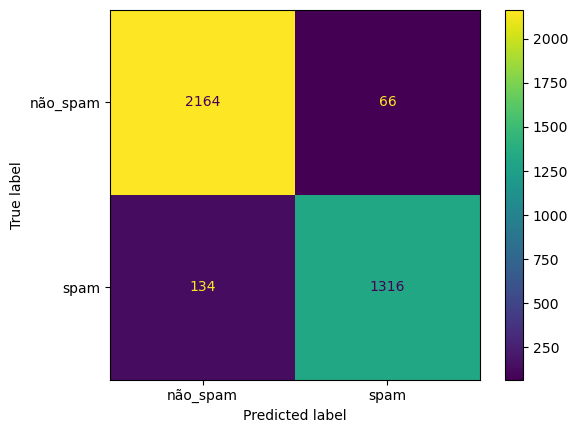

In [26]:
result=model_selection.cross_val_score(clf, X, y, cv=5)
print("Acurácia média: %.3f" % result.mean())
print("Desvio padrão: %.3f" % result.std())

# Calculando a predição para cada exemplo de teste
y_pred=model_selection.cross_val_predict(clf, X, y, cv=5)

# Calcular precisão
precision=precision_score(y, y_pred, average='macro')

# Calcular revocação
recall=recall_score(y, y_pred, average='macro')

# Calcular revocação
f1=f1_score(y, y_pred, average='macro')

print("Precision: %.3f" % precision)
print("Recall: %.3f" % recall)
print("f1: %.3f" % f1)

cm = confusion_matrix(y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['não_spam', 'spam'])
disp.plot()